Importing all libraries and functions

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Creating Dataset

In [2]:
data = {
    'Age': [25, 30, 28, np.nan, 22, 35, 40, 26, 32, np.nan, 21, 34, 31, 29, 33],
    'City': ['Pune', 'Delhi', 'Chennai', 'Mumbai', 'Delhi', 'Pune', np.nan, 'Mumbai', 'Delhi',
            'Chennai', 'Pune', 'Mumbai', 'Delhi', 'Pune', 'Chennai'],
    'Job': ['Engineer', 'Doctor', 'Manager', 'Engineer', 'Teacher', np.nan, 'Scientist', 'Teacher',
            'Engineer', 'Doctor', 'Engineer', 'Manager', 'Manager', 'Scientist', 'Doctor'],
    'Income': [65000, 80000, np.nan, 75000, 50000, 70000, 95000, 72000, 68000, 82000, 64000, 74000, 85000, 90000, 78000], 
    'Experience': [4, 8, 5, 2, 1, 6, 10, 3, 7, np.nan, 2, 6, 7, 9, 5]
}

dataSet = pd.DataFrame(data)
dataSet.to_csv('dummy_data.csv', index=False) 
print(dataSet)

     Age     City        Job   Income  Experience
0   25.0     Pune   Engineer  65000.0         4.0
1   30.0    Delhi     Doctor  80000.0         8.0
2   28.0  Chennai    Manager      NaN         5.0
3    NaN   Mumbai   Engineer  75000.0         2.0
4   22.0    Delhi    Teacher  50000.0         1.0
5   35.0     Pune        NaN  70000.0         6.0
6   40.0      NaN  Scientist  95000.0        10.0
7   26.0   Mumbai    Teacher  72000.0         3.0
8   32.0    Delhi   Engineer  68000.0         7.0
9    NaN  Chennai     Doctor  82000.0         NaN
10  21.0     Pune   Engineer  64000.0         2.0
11  34.0   Mumbai    Manager  74000.0         6.0
12  31.0    Delhi    Manager  85000.0         7.0
13  29.0     Pune  Scientist  90000.0         9.0
14  33.0  Chennai     Doctor  78000.0         5.0


Loading the dataset

In [3]:
dataSet = pd.read_csv(r'C:\Users\worka\OneDrive\Desktop\Github\python-common-book\machine learning\ids\assignments\dummy_data.csv')
print(dataSet)
print(dataSet.info())

     Age     City        Job   Income  Experience
0   25.0     Pune   Engineer  65000.0         4.0
1   30.0    Delhi     Doctor  80000.0         8.0
2   28.0  Chennai    Manager      NaN         5.0
3    NaN   Mumbai   Engineer  75000.0         2.0
4   22.0    Delhi    Teacher  50000.0         1.0
5   35.0     Pune        NaN  70000.0         6.0
6   40.0      NaN  Scientist  95000.0        10.0
7   26.0   Mumbai    Teacher  72000.0         3.0
8   32.0    Delhi   Engineer  68000.0         7.0
9    NaN  Chennai     Doctor  82000.0         NaN
10  21.0     Pune   Engineer  64000.0         2.0
11  34.0   Mumbai    Manager  74000.0         6.0
12  31.0    Delhi    Manager  85000.0         7.0
13  29.0     Pune  Scientist  90000.0         9.0
14  33.0  Chennai     Doctor  78000.0         5.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age        

Drop Column

In [4]:
dataSet = dataSet.drop('Experience', axis=1)  # Dropping the 'Experience' column
print(dataSet)

     Age     City        Job   Income
0   25.0     Pune   Engineer  65000.0
1   30.0    Delhi     Doctor  80000.0
2   28.0  Chennai    Manager      NaN
3    NaN   Mumbai   Engineer  75000.0
4   22.0    Delhi    Teacher  50000.0
5   35.0     Pune        NaN  70000.0
6   40.0      NaN  Scientist  95000.0
7   26.0   Mumbai    Teacher  72000.0
8   32.0    Delhi   Engineer  68000.0
9    NaN  Chennai     Doctor  82000.0
10  21.0     Pune   Engineer  64000.0
11  34.0   Mumbai    Manager  74000.0
12  31.0    Delhi    Manager  85000.0
13  29.0     Pune  Scientist  90000.0
14  33.0  Chennai     Doctor  78000.0


Data cleaning / Imputation

In [5]:
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer = imputer.fit(dataSet[['Age','Income']])
dataSet[['Age', 'Income']] = imputer.transform(dataSet[['Age', 'Income']])
print(dataSet)

          Age     City        Job        Income
0   25.000000     Pune   Engineer  65000.000000
1   30.000000    Delhi     Doctor  80000.000000
2   28.000000  Chennai    Manager  74857.142857
3   29.692308   Mumbai   Engineer  75000.000000
4   22.000000    Delhi    Teacher  50000.000000
5   35.000000     Pune        NaN  70000.000000
6   40.000000      NaN  Scientist  95000.000000
7   26.000000   Mumbai    Teacher  72000.000000
8   32.000000    Delhi   Engineer  68000.000000
9   29.692308  Chennai     Doctor  82000.000000
10  21.000000     Pune   Engineer  64000.000000
11  34.000000   Mumbai    Manager  74000.000000
12  31.000000    Delhi    Manager  85000.000000
13  29.000000     Pune  Scientist  90000.000000
14  33.000000  Chennai     Doctor  78000.000000


Label Encoding & OneHotEncoding


In [6]:
le = LabelEncoder()
dataSet['City'] = le.fit_transform(dataSet['City']) 
print(dataSet)

ct = ColumnTransformer([('onehot', OneHotEncoder(), ['Job'])], remainder='passthrough')
dataSet = ct.fit_transform(dataSet)
print(dataSet)

          Age  City        Job        Income
0   25.000000     3   Engineer  65000.000000
1   30.000000     1     Doctor  80000.000000
2   28.000000     0    Manager  74857.142857
3   29.692308     2   Engineer  75000.000000
4   22.000000     1    Teacher  50000.000000
5   35.000000     3        NaN  70000.000000
6   40.000000     4  Scientist  95000.000000
7   26.000000     2    Teacher  72000.000000
8   32.000000     1   Engineer  68000.000000
9   29.692308     0     Doctor  82000.000000
10  21.000000     3   Engineer  64000.000000
11  34.000000     2    Manager  74000.000000
12  31.000000     1    Manager  85000.000000
13  29.000000     3  Scientist  90000.000000
14  33.000000     0     Doctor  78000.000000
[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.50000000e+01 3.00000000e+00
  6.50000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.00000000e+01 1.00000000e+00
  8.00000000e+

Split 80/20

In [7]:
X = dataSet[:, :-1]
y = dataSet[:, -1]  

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12, 8)
X_test shape: (3, 8)
y_train shape: (12,)
y_test shape: (3,)


Feature scaling function (Standard Scaling)

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the feature scaling function parameters (mean and standard deviation)
print("Mean of each feature:", scaler.mean_)
print("Standard deviation of each feature:", scaler.scale_)

Mean of each feature: [ 0.16666667  0.25        0.16666667  0.16666667  0.16666667  0.08333333
 29.72435897  1.75      ]
Standard deviation of each feature: [0.372678   0.4330127  0.372678   0.372678   0.372678   0.2763854
 5.03473716 1.23322072]


In [9]:
print("""I acknowledge that on the evening of February 20th, I wrote the code that exists in this file.
I understand the implications of plagiarism and hereby take full responsibility.
~ Aryan Sinha""")


I acknowledge that on the evening of February 20th, I wrote the code that exists in this file.
I understand the implications of plagiarism and hereby take full responsibility.
~ Aryan Sinha


In [10]:
#applying linear regression 
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)
Y_train_predict = regression.predict(X_train)
Y_test_predict = regression.predict(X_test)
print("Prediction on Train Data",Y_train_predict)
print("Test data prediction",Y_test_predict)

Prediction on Train Data [ 84751.73038273  70000.          68586.68153565  76088.91051587
  79908.20438428  78091.79561572  56671.76299923  65328.23700077
  67333.73819205  83768.23234127  71079.5802723  100248.26961727]
Test data prediction [74859.67687925 91447.55416668 71242.34689662]


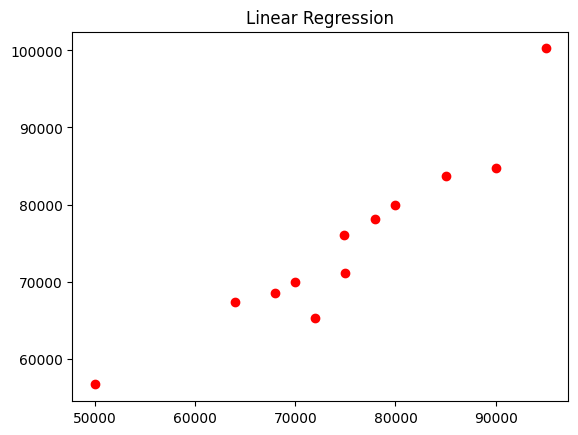

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_train,Y_train_predict, c='red')
plt.title('Linear Regression')
plt.show()

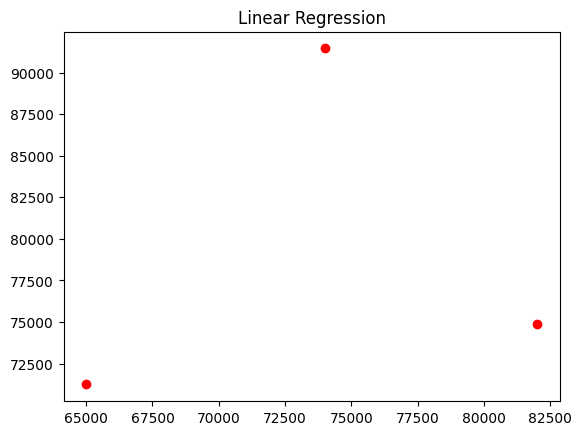

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test,Y_test_predict, color='red')
plt.title('Linear Regression')
plt.show()

In [13]:
print("Aryan Sinha")

Aryan Sinha
